# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

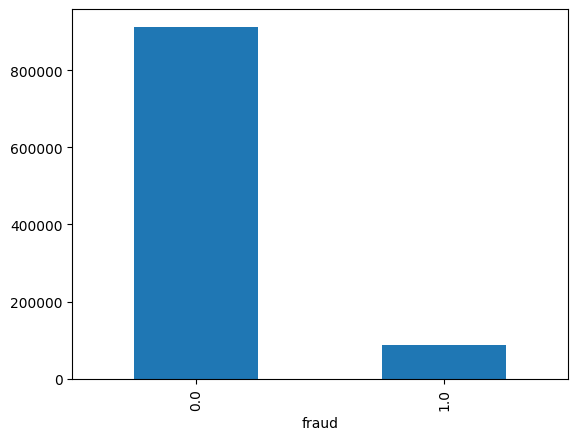

In [4]:
# Distribution of target variable
fraud_dist = fraud["fraud"].value_counts()
fraud_dist.plot(kind="bar")
plt.show()

We are dealing with an imbalanced dataset.

In [5]:
# Train a logistic regression
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test_scaled, y_test)

0.959176

In [10]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228222
         1.0       0.89      0.60      0.72     21778

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [11]:
# Oversample
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [12]:
train["fraud"] = y_train.values

In [13]:
fraud_yes = train[train["fraud"] == 1]
fraud_no = train[train["fraud"] == 0]

In [23]:
fraud_yes_oversampled = resample(fraud_yes, 
                                    replace=True, 
                                    n_samples = len(fraud_no),
                                    random_state=0)

In [24]:
train_over = pd.concat([fraud_no, fraud_yes_oversampled])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.369096,-0.216167,-0.503856,0.366528,1.361876,-0.334061,0.732942,0.0
1,0.662752,-0.042027,-0.158063,0.366528,1.361876,-0.334061,-1.364365,0.0
2,-0.064504,-0.206554,5.643139,0.366528,-0.734281,-0.334061,-1.364365,0.0
3,-0.174007,-0.066379,-0.221437,0.366528,1.361876,-0.334061,0.732942,0.0
5,-0.012736,-0.057590,-0.566645,0.366528,-0.734281,-0.334061,0.732942,0.0
...,...,...,...,...,...,...,...,...
238383,0.108611,-0.144125,1.255440,0.366528,-0.734281,-0.334061,0.732942,1.0
712685,-0.387417,-0.203715,1.404367,-2.728308,-0.734281,-0.334061,0.732942,1.0
741710,-0.328490,-0.183103,0.994931,0.366528,-0.734281,-0.334061,0.732942,1.0
714018,1.645969,-0.206521,-0.582310,0.366528,-0.734281,-0.334061,0.732942,1.0


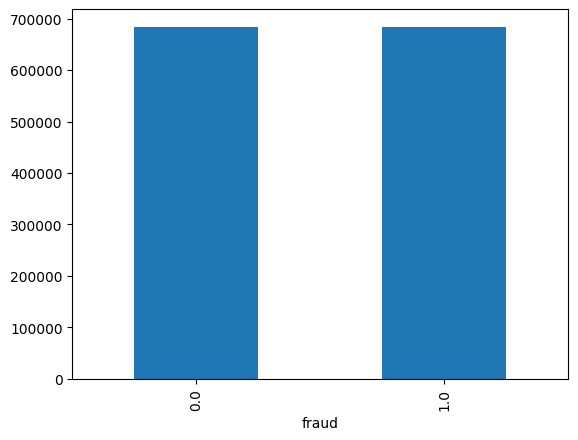

In [25]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [26]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [28]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\clair\anaconda3\envs\FirstEnvironment\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228222
         1.0       0.57      0.95      0.71     21778

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [29]:
# Undersampling
fraud_no_undersampled = resample(fraud_no, 
                                    replace=True, 
                                    n_samples = len(fraud_yes),
                                    random_state=0)

In [30]:
train_under = pd.concat([fraud_no_undersampled, fraud_yes])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
335079,-0.364808,-0.025712,0.628412,0.366528,-0.734281,-0.334061,0.732942,0.0
477681,-0.192652,-0.215693,-0.271615,0.366528,-0.734281,-0.334061,-1.364365,0.0
129296,0.442132,0.448308,-0.166062,0.366528,-0.734281,-0.334061,0.732942,0.0
167088,-0.074178,-0.213330,0.065343,0.366528,-0.734281,-0.334061,0.732942,0.0
394322,-0.329771,-0.187769,0.275845,0.366528,-0.734281,2.993463,-1.364365,0.0
...,...,...,...,...,...,...,...,...
749958,2.466706,-0.201607,-0.329749,0.366528,-0.734281,-0.334061,0.732942,1.0
749964,-0.131789,-0.155147,0.905041,0.366528,1.361876,-0.334061,0.732942,1.0
749967,9.121532,-0.218472,-0.318124,0.366528,-0.734281,-0.334061,0.732942,1.0
749975,1.211659,-0.202391,-0.519847,0.366528,-0.734281,-0.334061,0.732942,1.0


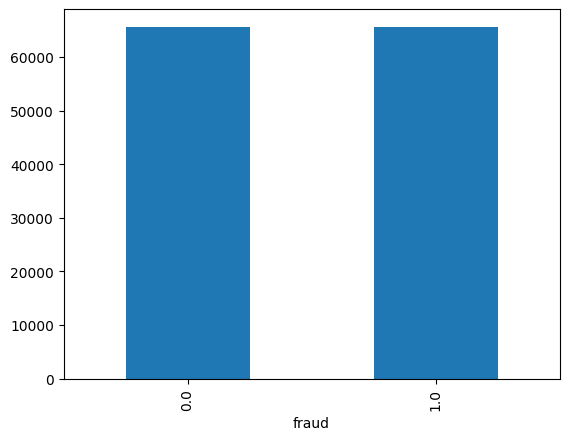

In [31]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [33]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [35]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\clair\anaconda3\envs\FirstEnvironment\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228222
         1.0       0.57      0.95      0.72     21778

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [40]:
# SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 550.5 kB/s eta 0:00:01
   ---------------------- --------------- 143.4/238.4 kB 853.3 kB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.3 MB/s eta 0:00:00


In [41]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [42]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [43]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [44]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228222
         1.0       0.57      0.95      0.71     21778

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

